In [1]:
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# brown and blue color pallette
sns.set_palette(sns.color_palette(sns.diverging_palette(250, 30, l=65, center="dark")))
sns.set_context('notebook')
sns.set_style('darkgrid')

# File Exploration

In [2]:
# all image file descriptions
base11 = pd.read_excel('../data/MESSIDOR_images/Base11/Annotation_Base11.xls')
base12 = pd.read_excel('../data/MESSIDOR_images/Base12/Annotation_Base12.xls')
base13 = pd.read_excel('../data/MESSIDOR_images/Base13/Annotation_Base13.xls')
base14 = pd.read_excel('../data/MESSIDOR_images/Base14/Annotation_Base14.xls')

base21 = pd.read_excel('../data/MESSIDOR_images/Base21/Annotation_Base21.xls')
base22 = pd.read_excel('../data/MESSIDOR_images/Base22/Annotation_Base22.xls')
base23 = pd.read_excel('../data/MESSIDOR_images/Base23/Annotation_Base23.xls')
base24 = pd.read_excel('../data/MESSIDOR_images/Base24/Annotation_Base24.xls')

base31 = pd.read_excel('../data/MESSIDOR_images/Base31/Annotation_Base31.xls')
base32 = pd.read_excel('../data/MESSIDOR_images/Base32/Annotation_Base32.xls')
base33 = pd.read_excel('../data/MESSIDOR_images/Base33/Annotation_Base33.xls')
base34 = pd.read_excel('../data/MESSIDOR_images/Base34/Annotation_Base34.xls')

In [3]:
# combine all files to one dataframe
df = pd.concat([base11,base12,base13,base14,base21,base22,base23,base24,base31,base32,base33,base34])

In [4]:
df.head()

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
0,20051019_38557_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1
1,20051020_43808_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
2,20051020_43832_0100_PP.tif,Service Ophtalmologie Lariboisière,1,0
3,20051020_43882_0100_PP.tif,Service Ophtalmologie Lariboisière,2,0
4,20051020_43906_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2


# Fix Grading Mistakes

In [5]:
mistakes = ['20051020_64007_0100_PP.tif', '20051020_63936_0100_PP.tif', '20060523_48477_0100_PP.tif',
           '20051020_63045_0100_PP.tif']
value_replacements = [3,1,3,0]

In [6]:
mistake_df = df[df['Image name'].isin(mistakes)]
mistake_df

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
59,20051020_63045_0100_PP.tif,Service Ophtalmologie Lariboisière,3,0
65,20051020_63936_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2
66,20051020_64007_0100_PP.tif,Service Ophtalmologie Lariboisière,1,2
66,20060523_48477_0100_PP.tif,Service Ophtalmologie Lariboisière,2,0


In [7]:
indexer = 0
for mistake in mistakes:
    df['Retinopathy grade'][df['Image name'] == mistake] = value_replacements[indexer]
    indexer += 1

In [8]:
df[df['Image name'].isin(mistakes)]

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
59,20051020_63045_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
65,20051020_63936_0100_PP.tif,Service Ophtalmologie Lariboisière,1,2
66,20051020_64007_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2
66,20060523_48477_0100_PP.tif,Service Ophtalmologie Lariboisière,3,0


# Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Image name                 1200 non-null   object
 1   Ophthalmologic department  1200 non-null   object
 2   Retinopathy grade          1200 non-null   int64 
 3   Risk of macular edema      1200 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
df['Retinopathy grade'].describe()

count    1200.000000
mean        1.172500
std         1.216132
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Retinopathy grade, dtype: float64

In [11]:
df['Risk of macular edema '].describe()

count    1200.000000
mean        0.314167
std         0.683756
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Risk of macular edema , dtype: float64

In [12]:
# convert diagnoses to binary code
binary_grade = []
for grade in df['Retinopathy grade']:
    if grade == 0:
        binary_grade.append(0)
    else:
        binary_grade.append(1)
        
print(list(df['Retinopathy grade'][:10]))
print(binary_grade[:10])

df['Binary grade'] = binary_grade

[3, 0, 1, 2, 3, 0, 0, 0, 3, 0]
[1, 0, 1, 1, 1, 0, 0, 0, 1, 0]


In [13]:
df.head()

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema,Binary grade
0,20051019_38557_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1,1
1,20051020_43808_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0,0
2,20051020_43832_0100_PP.tif,Service Ophtalmologie Lariboisière,1,0,1
3,20051020_43882_0100_PP.tif,Service Ophtalmologie Lariboisière,2,0,1
4,20051020_43906_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2,1


In [14]:
# split data frames by grade
no_dr = df[df['Retinopathy grade'] == 0]
mild_dr = df[df['Retinopathy grade'] == 1]
moderate_dr = df[df['Retinopathy grade'] == 2]
severe_dr = df[df['Retinopathy grade'] == 3]

In [15]:
dataframes = [no_dr, mild_dr, moderate_dr, severe_dr, df]
names = ['no_dr', 'mild_dr', 'moderate_dr', 'severe_dr', 'final_df']

In [16]:
# export each df as it's own csv file
for name, dataframe in zip(names, dataframes):
    out_csv = '../data/{}.csv'.format(name)
    dataframe.to_csv(out_csv)

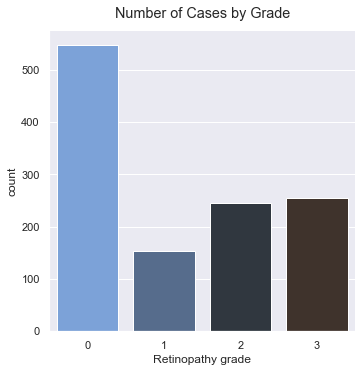

In [17]:
f = sns.catplot(x='Retinopathy grade', data=df, kind='count')
f.fig.suptitle('Number of Cases by Grade', y=1.03, x=0.54)
plt.savefig('../figures/number_of_cases.png', bbox_inches='tight', pad_inches=0.5)

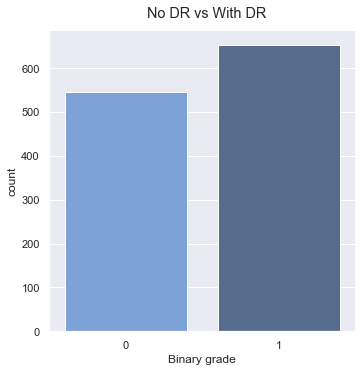

In [18]:
f = sns.catplot(x='Binary grade', data=df, kind='count')
f.fig.suptitle('No DR vs With DR', y=1.03, x=0.55)
plt.savefig('../figures/binary_classification.png', bbox_inches='tight', pad_inches=0.5)

In [19]:
print('There are {} total eyes.'.format(len(df)))
print('There are {} eyes with diabteic retinopathy.'.format(len(df[df['Binary grade'] == 1])))
print('There are {} eyes without diabteic retinopathy.'.format(len(df[df['Binary grade'] == 0])))

There are 1200 total eyes.
There are 653 eyes with diabteic retinopathy.
There are 547 eyes without diabteic retinopathy.


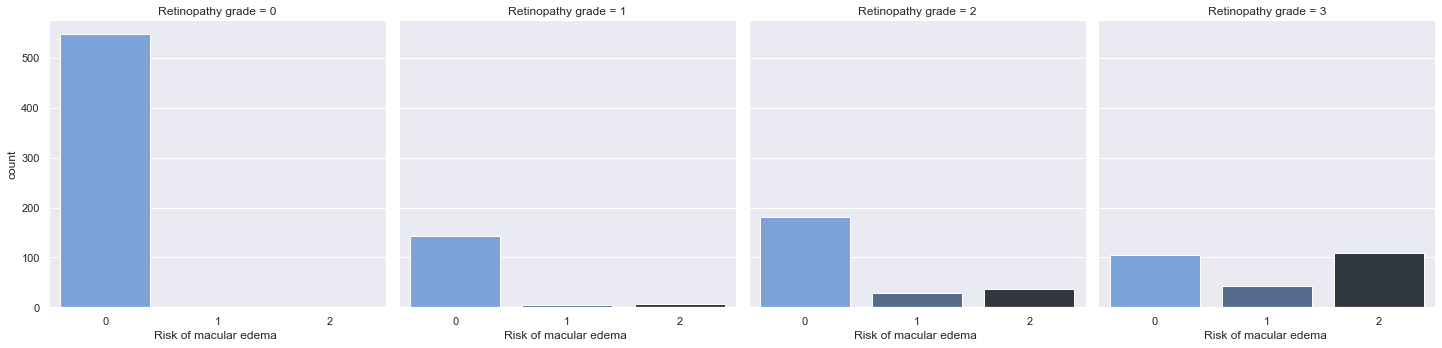

In [20]:
f = sns.catplot(x='Risk of macular edema ', data=df, kind='count', col='Retinopathy grade')
plt.savefig('../figures/edema_by_grade.png', bbox_inches='tight', pad_inches=0.5)